Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 205ms/step
Training Bernoulli Naive Bayes for InceptionV3...
Performance metrics for Bernoulli Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59       105
           1       0.46      0.68      0.55       105
           2       0.67      0.47      0.55       105
           3       0.68      0.51      0.59       105
           4       0.50      0.74      0.60       105

    accuracy                           0.58       525
   macro avg       0.62      0.58      0.58       525
weighted avg       0.62      0.58      0.58       525

Accuracy: 0.5752380952380952
Sensitivity: 0.5752380952380952
Precision: 0.6182572087547757
F1 Score: 0.5752282421017623



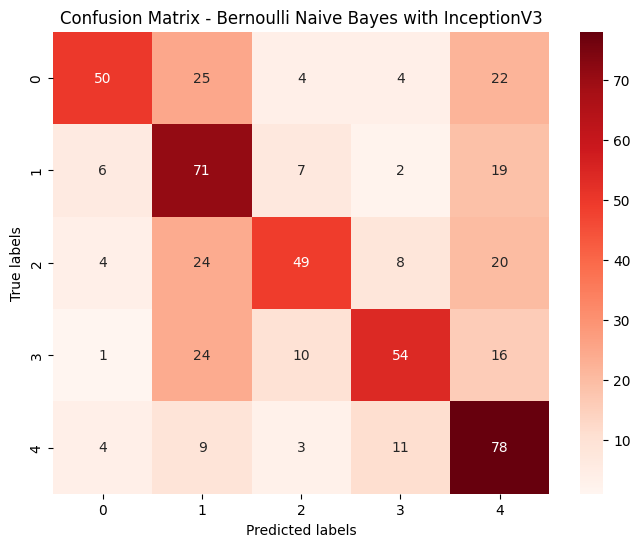

Training Multinomial Naive Bayes for InceptionV3...
Performance metrics for Multinomial Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       105
           1       0.47      0.71      0.57       105
           2       0.57      0.45      0.50       105
           3       0.64      0.52      0.58       105
           4       0.51      0.69      0.59       105

    accuracy                           0.56       525
   macro avg       0.59      0.56      0.56       525
weighted avg       0.59      0.56      0.56       525

Accuracy: 0.56
Sensitivity: 0.5599999999999999
Precision: 0.5947779053139804
F1 Score: 0.5572890650806941



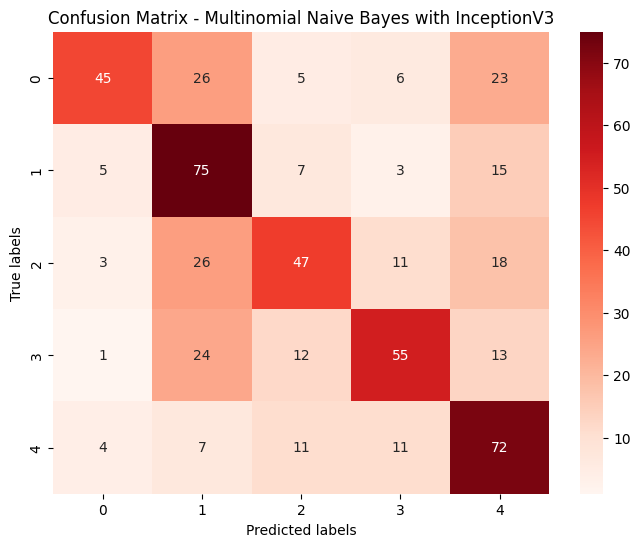

Training Complement Naive Bayes for InceptionV3...
Performance metrics for Complement Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.39      0.53       105
           1       0.42      0.70      0.52       105
           2       0.85      0.22      0.35       105
           3       0.65      0.47      0.54       105
           4       0.42      0.79      0.55       105

    accuracy                           0.51       525
   macro avg       0.63      0.51      0.50       525
weighted avg       0.63      0.51      0.50       525

Accuracy: 0.5142857142857142
Sensitivity: 0.5142857142857143
Precision: 0.633346733797097
F1 Score: 0.49965585252811306



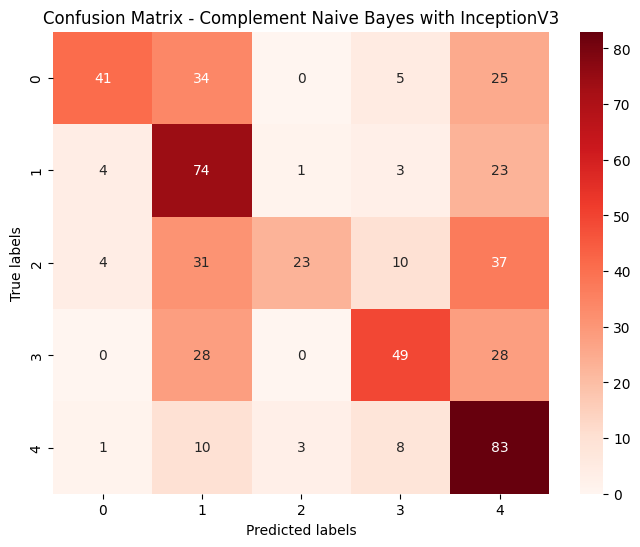

Training Gaussian Naive Bayes for InceptionV3...
Performance metrics for Gaussian Naive Bayes with InceptionV3:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.99      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       0.98      1.00      0.99       105
           4       1.00      0.99      1.00       105

    accuracy                           0.99       525
   macro avg       0.99      0.99      0.99       525
weighted avg       0.99      0.99      0.99       525

Accuracy: 0.9942857142857143
Sensitivity: 0.9942857142857143
Precision: 0.9943748897901605
F1 Score: 0.9942853255264715



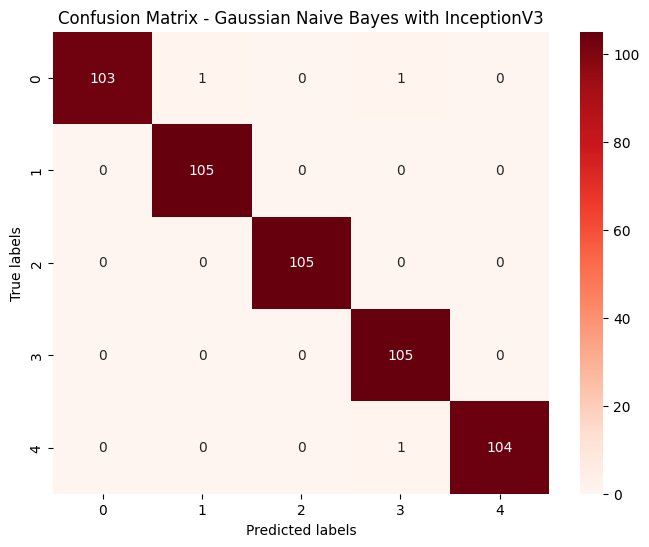

In [2]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# InceptionV3
model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False)

# Function to extract features from an image using InceptionV3
def extract_features_inceptionv3(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # Target size for InceptionV3
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_inceptionv3.predict(img_data)
    return features

# Load images and extract features for InceptionV3
x_train_inceptionv3, y_train_inceptionv3 = [], []
x_test_inceptionv3, y_test_inceptionv3 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_inceptionv3(os.path.join(class_dir, img_path))
        x_train_inceptionv3.append(features)
        y_train_inceptionv3.append(i)

# Load images and extract features for InceptionV3
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_inceptionv3(os.path.join(class_dir, img_path))
        x_test_inceptionv3.append(features)
        y_test_inceptionv3.append(i)

# Flatten the features for InceptionV3
x_train_flat_inceptionv3 = np.array([feature.flatten() for feature in x_train_inceptionv3])
x_test_flat_inceptionv3 = np.array([feature.flatten() for feature in x_test_inceptionv3])

# Scale the input features to the range [0, 1] for InceptionV3
scaler_inceptionv3 = MinMaxScaler()
x_train_scaled_inceptionv3 = scaler_inceptionv3.fit_transform(x_train_flat_inceptionv3)
x_test_scaled_inceptionv3 = scaler_inceptionv3.transform(x_test_flat_inceptionv3)

# Ensure non-negative values for InceptionV3
min_value_inceptionv3 = np.min(np.concatenate([x_train_scaled_inceptionv3, x_test_scaled_inceptionv3]))
x_train_scaled_non_negative_inceptionv3 = x_train_scaled_inceptionv3 - min_value_inceptionv3
x_test_scaled_non_negative_inceptionv3 = x_test_scaled_inceptionv3 - min_value_inceptionv3

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for InceptionV3
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for InceptionV3...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_inceptionv3, y_train_inceptionv3)
    # Predict on test set
    y_pred_inceptionv3 = clf.predict(x_test_scaled_non_negative_inceptionv3)
    # Print performance metrics for InceptionV3
    print(f'Performance metrics for {clf_name} with InceptionV3:')
    print('Classification Report:')
    print(classification_report(y_test_inceptionv3, y_pred_inceptionv3))
    # Additional performance metrics
    accuracy_inceptionv3 = metrics.accuracy_score(y_test_inceptionv3, y_pred_inceptionv3)
    sensitivity_inceptionv3 = metrics.recall_score(y_test_inceptionv3, y_pred_inceptionv3, average='macro')
    precision_inceptionv3 = metrics.precision_score(y_test_inceptionv3, y_pred_inceptionv3, average='macro')
    f1_inceptionv3 = metrics.f1_score(y_test_inceptionv3, y_pred_inceptionv3, average='macro')
    print(f'Accuracy: {accuracy_inceptionv3}')
    print(f'Sensitivity: {sensitivity_inceptionv3}')
    print(f'Precision: {precision_inceptionv3}')
    print(f'F1 Score: {f1_inceptionv3}\n')
    # Plot confusion matrix
    cm_inceptionv3 = confusion_matrix(y_test_inceptionv3, y_pred_inceptionv3)
    # Heatmap
    # Plot confusion matrix for InceptionV3
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_inceptionv3, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with InceptionV3')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

